Enter the beam length: 6
Enter no. of point loads acting on your beam: 0
Enter the load values along with its x coordinate(Origin is at left end of the beam)
Enter no. of point moments acting on your beam: 1
Enter the moment values along with its x coordinate(Origin is at left end of the beam)
Enter value of point moment  1 : -64
Enter the location of moment  1 : 2
We are concidering linearly varing load as one distributed load
Enter no. of distributed loads acting on your beam: 1
Enter the starting and ending value of distributed load along with their coordinates
Enter the starting value of distributed load  1 : 24
Enter the coordinate of starting point of distributed load  1 : 4
Enter the ending value of distributed load  1 : 24
Enter the coordinate of ending point of distributed load  1 : 6
Enter the beam type (s-Simple supported,c-Cantilever): s
Enter the position of first support from left: 0
Enter the position of second support from left: 4
First support reaction (Acting upwards)

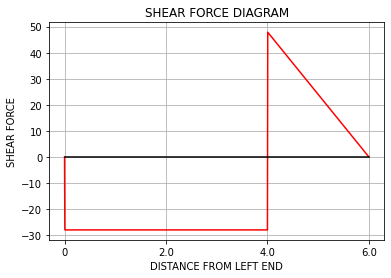

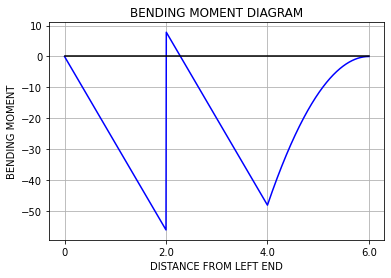

Shear stress equations
0 < X < 2.0
 
-28 

2.0 < X < 4.0
 
-28 

4.0 < X < 6.0
 
-24 x + 144 

Bending moment equations
0 < X < 2.0
 
-28 x 

2.0 < X < 4.0
 
-28 x + 64 

4.0 < X < 6.0
     2
-12 x + 144 x - 432 



In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random as ra
C1=[]
C2=[]
print("LIMITATIONS OF THE CODE: This program is limited for the BEAM PROBLEMS where only pointloads, pointmoments and linearly varing loads are present")
print("CONVENTIONS FOR INPUT: Downward forces are +ve ; Anti-Clockwise moments are -ve")
L=float(input("Enter the beam length: "))
n_pl=int(input("Enter no. of point loads acting on your beam: "))
pl=[]
if n_pl!=0:
    print("Enter the load values along with its x coordinate(Origin is at left end of the beam)")
for i in range(n_pl):
    print("Enter value of point load ",i+1,": ",end="")
    l=float(input())
    print("Enter the location of load ",i+1,": ",end="")
    x=float(input())
    pl.append([l,x])
n_pm=int(input("Enter no. of point moments acting on your beam: "))
pm=[]
if n_pm!=0:
    print("Enter the moment values along with its x coordinate(Origin is at left end of the beam)")
for i in range(n_pm):
    print("Enter value of point moment ",i+1,": ",end="")
    m=float(input())
    print("Enter the location of moment ",i+1,": ",end="")
    x=float(input())
    pm.append([m,x])
print("We are concidering linearly varing load as one distributed load")
n_dl=int(input("Enter no. of distributed loads acting on your beam: "))
dl=[]
if n_dl!=0:
    print("Enter the starting and ending value of distributed load along with their coordinates(Origin is at left end of the beam)")
for i in range(n_dl):
    print("Enter the starting value of distributed load ",i+1,": ",end="")
    ls=float(input())
    print("Enter the coordinate of starting point of distributed load ",i+1,": ",end="")
    xs=float(input())
    print("Enter the ending value of distributed load ",i+1,": ",end="")
    le=float(input())
    print("Enter the coordinate of ending point of distributed load ",i+1,": ",end="")
    xe=float(input())
    dl.append([[ls,xs],[le,xe]])
T=input("Enter the beam type (s-Simple supported,c-Cantilever): ")
if T=='c': # FOR CANTILEVER BEAMS
    position=input("Enter the position of support(l=Left,r-Right): ")
    sp=0
    for i in range(n_pl): # TO CALCULATE NET DOWNWARD FORCE DUE TO ALL POINT LOADS
        sp+=pl[i][0]
    sd=0
    for i in range(n_dl): # TO CALCULATE NET DOWNWARD FORCE DUE TO ALL DISTRIBUTED LOADS
        sd+=0.5*(dl[i][1][1]-dl[i][0][1])*(dl[i][1][0]+dl[i][0][0])
    R=sd+sp # FINDING SUPPORT REACTION FORCE
    print("Support reaction force value(Acting upwards) = ",R)
    spm=0
    for i in range(n_pm): # TO CALCULATE NET ANTI-CLOCKWISE MOMENT ABOUT LEFT END DUE TO ALL POINT MOMENTS
        spm-=pm[i][0]
    splm=0
    for i in range(n_pl): # TO CALCULATE NET ANTI-CLOCKWISE MOMENT ABOUT LEFT END DUE TO ALL POINT LOADS
        splm+=(pl[i][0]*pl[i][1])
    sdlm=0
    for i in range(n_dl): # TO CALCULATE NET ANTI-CLOCKWISE MOMENT ABOUT LEFT END DUE TO ALL DISTRIBUTED LOADS
        if dl[i][1][0]>=dl[i][0][0]:
            sdlm+=((dl[i][1][1]-dl[i][0][1])*((dl[i][0][1]+2*dl[i][1][1])*dl[i][1][0]+(dl[i][1][1]+2*dl[i][0][1])*dl[i][0][0])/6)
        else:
            sdlm+=((dl[i][1][1]-dl[i][0][1])*((4*dl[i][0][1]-dl[i][1][1])*dl[i][1][0]+(4*dl[i][1][1]-dl[i][0][1])*dl[i][0][0])/6)
    if position=="l": # FINDING SUPPORT REACTION MOMENT
        M=spm+splm+sdlm
        print("Support reaction moment value(Acting anticlockwise) = ",M)
        pl.append([-R,0])
        pm.append([M,0])
    else:
        M=-(spm+splm+sdlm)
        print("Support reaction moment value(Acting clockwise) = ",M)
        pl.append([-R,L])
        pm.append([-M,L])
else: # FOR SIMPLE SUPPORTED BEAMS
    p1=float(input("Enter the position of first support from left: "))
    p2=float(input("Enter the position of second support from left: "))
    spm=0
    for i in range(n_pm): # TO CALCULATE NET ANTI-CLOCKWISE MOMENT ABOUT LEFT SUPPORT DUE TO ALL POINT MOMENTS 
        spm-=pm[i][0]
    splm=0
    for i in range(n_pl): # TO CALCULATE NET ANTI-CLOCKWISE MOMENT ABOUT LEFT SUPPORT DUE TO ALL POINT LOADS
        splm+=(pl[i][0]*(pl[i][1]-p1))
    sdlm=0
    for i in range(n_dl): # TO CALCULATE NET ANTI-CLOCKWISE MOMENT ABOUT LEFT SUPPORT DUE TO ALL DISTRIBUTED LOADS
        dl[i][0][1]-=p1
        dl[i][1][1]-=p1
        if dl[i][1][0]>=dl[i][0][0]:
            sdlm+=((dl[i][1][1]-dl[i][0][1])*((dl[i][0][1]+2*dl[i][1][1])*dl[i][1][0]+(dl[i][1][1]+2*dl[i][0][1])*dl[i][0][0])/6)
        else:
            sdlm+=((dl[i][1][1]-dl[i][0][1])*((4*dl[i][0][1]-dl[i][1][1])*dl[i][1][0]+(4*dl[i][1][1]-dl[i][0][1])*dl[i][0][0])/6)
        dl[i][0][1]+=p1
        dl[i][1][1]+=p1
    RB=(spm+splm+sdlm)/(p2-p1) # FINDING RIGHT SUPPORT REACTION FORCE
    sp=0
    for i in range(n_pl): # TO CALCULATE NET DOWNWARD FORCE DUE TO ALL POINT LOADS
        sp+=pl[i][0]
    sd=0
    for i in range(n_dl): # TO CALCULATE NET DOWNWARD FORCE DUE TO ALL DISTRIBUTED LOADS
        sd+=0.5*(dl[i][1][1]-dl[i][0][1])*(dl[i][1][0]+dl[i][0][0])
    R=sd+sp
    RA=R-RB # FINDING LEFT SUPPORT REACTION FORCE
    print("First support reaction (Acting upwards) = ",RA)
    print("Second support reaction (Acting upwards) = ",RB)
    pl.append([-RA,p1])
    pl.append([-RB,p2])
div=[]
for i in range(len(pl)):
    div.append(pl[i][1])
for i in range(len(pm)):
    div.append(pm[i][1])
for i in range(n_dl):
    div.append(dl[i][0][1])
    div.append(dl[i][1][1])
sdiv=[]
while len(div)>0:
    minim=div[0]
    for i in range(len(div)):
        if minim>div[i]:
            minim=div[i]
    sdiv.append(minim)
    div.remove(minim)
r_div=[]
for i in range(len(sdiv)):
    if i!=len(sdiv)-1:
        if sdiv[i]==sdiv[i+1]:
            r_div.append(sdiv[i])
for i in r_div:
    sdiv.remove(i)
if sdiv[0]==0:
    sdiv.remove(0)
v=[]
x=np.linspace(0,L,1000)
for k in range(len(x)): # TO FIND SHEAR FORCE AT EACH POINT X ON THE BEAM
    sf=0
    for j in range(len(pl)):
        if pl[j][1]<x[k]:
            sf+=pl[j][0]
    for j in range(len(dl)):
        if dl[j][0][1]<x[k] and dl[j][1][1]>x[k]:
            sf+=((x[k]-dl[j][0][1])*(dl[j][0][0]+0.5*x[k]*((dl[j][1][0]-dl[j][0][0])/(dl[j][1][1]-dl[j][0][1]))))
        elif dl[j][1][1]<=x[k]:
            sf+=(0.5*(dl[j][0][0]+dl[j][1][0])*(dl[j][1][1]-dl[j][0][1]))
    v.append(-sf)
x_sdiv=[]
v_sdiv=[]
for i in range(len(sdiv)):
    xsdiv=[]
    vsdiv=[]
    for j in range(len(x)):
        if i!=0:
            if x[j]<sdiv[i] and x[j]>sdiv[i-1]:
                xsdiv.append(x[j])
                vsdiv.append(v[j])
        else:
            if x[j]<sdiv[i] and x[j]>0:
                xsdiv.append(x[j])
                vsdiv.append(v[j])
    x_sdiv.append(xsdiv)
    v_sdiv.append(vsdiv)
plt.plot(x,v,"r-") # PLOTING SHEAR FORCE DIAGRAM
x_ticks=[]
x_ticks.append(0)
x_ticks.extend(sdiv)
my_xticks=[]
for j in x_ticks:
    my_xticks.append(str(j))
plt.xticks(x_ticks,my_xticks)
plt.plot([L,L],[0,v[-1]],"r-")
plt.plot([0,L],[0,0],"k-")
plt.title("SHEAR FORCE DIAGRAM")
plt.xlabel("DISTANCE FROM LEFT END")
plt.ylabel("SHEAR FORCE")
plt.grid()
plt.show()
m=[]
for k in range(len(x)): # TO FIND BENDING MOMENT AT EACH POINT X ON THE BEAM
    sm=0
    for j in range(len(pm)):
        if pm[j][1]<x[k]:
            sm+=pm[j][0]
    for j in range(len(pl)):
        if pl[j][1]<x[k]:
            sm+=pl[j][0]*(x[k]-pl[j][1])
    for j in range(len(dl)):
        if dl[j][1][1]<x[k]:
            sm+=((((dl[j][0][0]+dl[j][1][0])/2)*(dl[j][1][1]-dl[j][0][1]))*((x[k]-dl[j][1][1]))+((dl[j][1][1]-dl[j][0][1])*(dl[j][1][0]+2*dl[j][0][0]))/(3*(dl[j][1][0]+dl[j][0][0])))
        elif dl[j][0][1]<x[k]:
            sm+=((dl[j][0][0]+((dl[j][1][0]-dl[j][0][0])*(x[k]-dl[j][0][1])/(2*(dl[j][1][1]-dl[j][0][1]))))*(x[k]-dl[j][0][1]))*(((x[k]-dl[j][0][1])*(3*dl[j][0][0]+((dl[j][1][0]-dl[j][0][0])*(x[k]-dl[j][0][1])/(dl[j][1][1]-dl[j][0][1]))))/(3*(2*dl[j][0][0]+((dl[j][1][0]-dl[j][0][0])*(x[k]-dl[j][0][1])/(dl[j][1][1]-dl[j][0][1])))))
    m.append(-sm)
x_sdiv=[]
m_sdiv=[]
for i in range(len(sdiv)):
    xsdiv=[]
    msdiv=[]
    for j in range(len(x)):
        if i!=0:
            if x[j]<sdiv[i] and x[j]>sdiv[i-1]:
                xsdiv.append(x[j])
                msdiv.append(m[j])
        else:
            if x[j]<sdiv[i] and x[j]>0:
                xsdiv.append(x[j])
                msdiv.append(m[j])
    x_sdiv.append(xsdiv)
    m_sdiv.append(msdiv)
plt.plot(x,m,"b-") # PLOTING BENDING MOMENT DIAGRAM
plt.xticks(x_ticks,my_xticks)
plt.plot([L,L],[0,m[-1]],"b-")
plt.plot([0,L],[0,0],"k-")
plt.title("BENDING MOMENT DIAGRAM")
plt.xlabel("DISTANCE FROM LEFT END")
plt.ylabel("BENDING MOMENT")
plt.grid()
plt.show()
Cv=[]
Cm=[]
for i in range(len(sdiv)):
    Cv.append(list(np.polyfit(x_sdiv[i],v_sdiv[i],3)))
    Cm.append(list(np.polyfit(x_sdiv[i],m_sdiv[i],3)))
    for j in range(4):
        Cv[i][j]=round(Cv[i][j],2)
        Cm[i][j]=round(Cm[i][j],2)
print("Shear stress equations")
for i in range(len(sdiv)):
    if i==0:
        print(0,"< X <",sdiv[i])
        print(np.poly1d(Cv[i]),"\n")
    else:
        print(sdiv[i-1],"< X <",sdiv[i])
        print(np.poly1d(Cv[i]),"\n")
print("Bending moment equations")
for i in range(len(sdiv)):
    if i==0:
        print(0,"< X <",sdiv[i])
        print(np.poly1d(Cm[i]),"\n")
    else:
        print(sdiv[i-1],"< X <",sdiv[i])
        print(np.poly1d(Cm[i]),"\n")





            
